In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
dataset =pd.read_csv("Mall_Customers.csv")

In [45]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [46]:
dataset.head() #display starting 5 elements

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [48]:
dataset.shape #shape of the dataset

(200, 5)

In [49]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [50]:
# Check for missing values in the dataset
print(dataset.isna().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [51]:
print("\nValue counts of the target variable:")
print(dataset['Gender'].value_counts())


Value counts of the target variable:
Female    112
Male       88
Name: Gender, dtype: int64


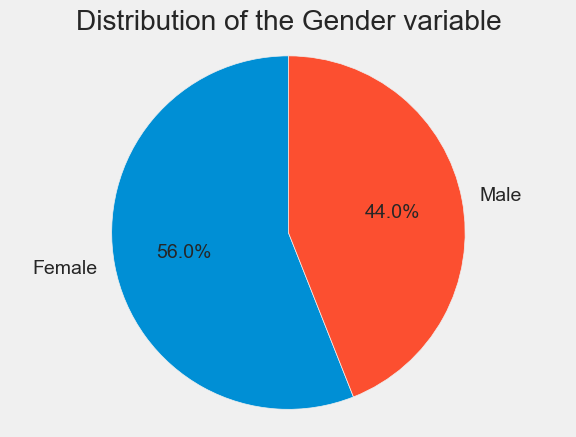

In [52]:
ratio = dataset['Gender'].value_counts()
labels = ratio.index[0], ratio.index[1]
sizes = [ratio.values[0], ratio.values[1]]

figure, axis = plt.subplots()
axis.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
axis.axis('equal')
plt.title("Distribution of the Gender variable")
plt.show()

In [53]:
datay =set(dataset['Gender'])
dataset['Gender'] =dataset['Gender'].map({'Female':0,'Male':1}).astype(int)

In [54]:
categorical_val = []
continuous_val = []
for column in dataset.columns:
    if len(dataset[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)



In [55]:
print(categorical_val)
continuous_val

['Gender']


['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

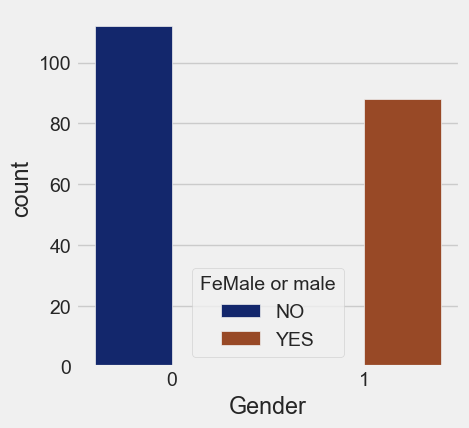

In [118]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=dataset, x=column, hue='Gender', palette='dark', saturation=0.7)
    plt.xlabel(column)
    plt.legend(title='FeMale or male', labels=['NO', 'YES'])

plt.show()

In [35]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


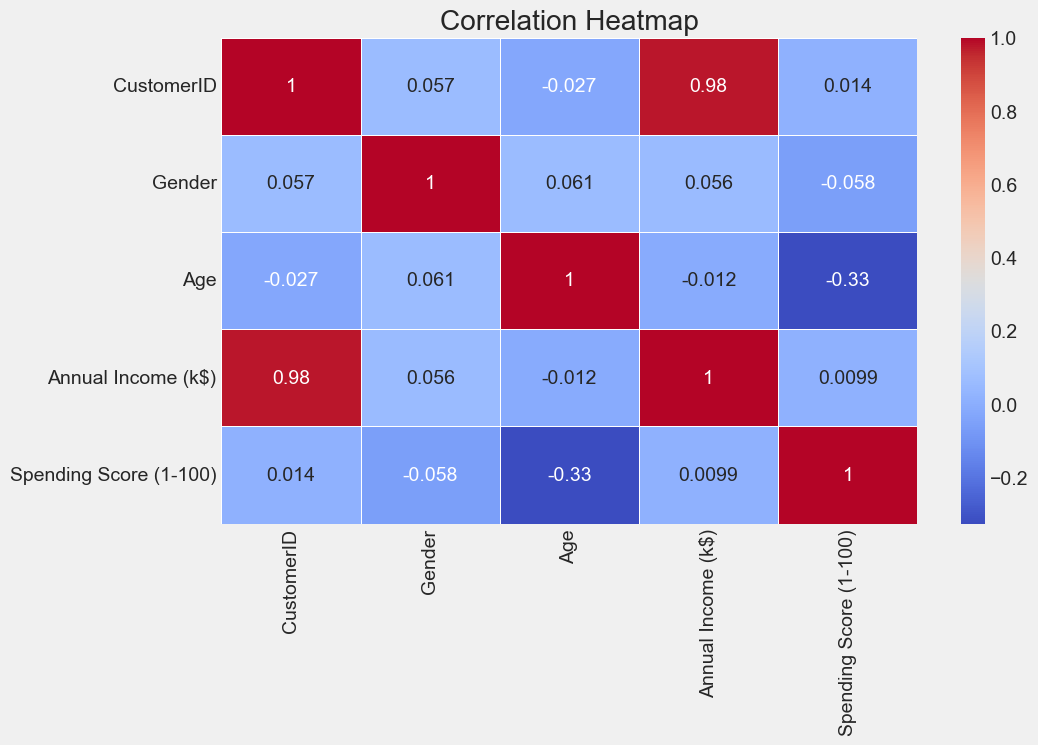

In [59]:
correlation_matrix = dataset.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [61]:
#

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [104]:
X=dataset.drop(['CustomerID','Spending Score (1-100)'],axis=1)
y =dataset.drop(['Annual Income (k$)','Gender','Age','CustomerID'],axis=1)

In [105]:
print(y)

     Spending Score (1-100)
0                        39
1                        81
2                         6
3                        77
4                        40
..                      ...
195                      79
196                      28
197                      74
198                      18
199                      83

[200 rows x 1 columns]


In [106]:
print(X)

     Gender  Age  Annual Income (k$)
0         1   19                  15
1         1   21                  15
2         0   20                  16
3         0   23                  16
4         0   31                  17
..      ...  ...                 ...
195       0   35                 120
196       0   45                 126
197       1   32                 126
198       1   32                 137
199       1   30                 137

[200 rows x 3 columns]


In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [108]:
#multiple linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [110]:
y_predml=regressor.predict(X_test)
print(y_predml)

[[58.67481119]
 [35.21176026]
 [44.56175816]
 [33.10787564]
 [53.56839006]
 [58.99529835]
 [58.95925124]
 [54.42443731]
 [60.01635127]
 [55.83024369]
 [58.25006634]
 [39.70372998]
 [52.13436447]
 [45.53851013]
 [34.3793831 ]
 [45.50349382]
 [58.88593985]
 [61.47756527]
 [50.1118587 ]
 [40.55401092]
 [52.38378821]
 [52.26083551]
 [44.94117127]
 [56.5394286 ]
 [61.28785872]
 [63.30787695]
 [52.66846782]
 [49.74603981]
 [56.26609521]
 [50.29021903]
 [58.29539809]
 [55.70377266]
 [51.27152012]
 [58.91743783]
 [40.18922281]
 [59.56010844]
 [46.22730372]
 [38.99126631]
 [55.78060239]
 [53.4169786 ]]


In [124]:
#using classifications model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])